# Template

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from matplotlib.gridspec import GridSpec
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

In [3]:
U_E = np.array([-1.5, -1, -0.5, 0, 0.5, 1, 1.5])

# R = 33 kOHM
U_A1 = np.array([5, 3.33, 1.69, 0.001, -1.69, -3.28, -4.98])

# R = 10 kOHM
U_A2 = np.array([1.52, 1.01, 0.51, 0.001, -0.5, -1.01, -1.51])

# R = 100 kOHM
U_A3 = np.array([14.41, 10.25, 5.24, 0.01, -5.09, -10.14, -13.08])

In [4]:
print("$U_E$ / V & $U_A$ / V")
for i in range(len(U_E)):
    print(fr'${U_E[i]:.3f} \pm {abs(U_E[i])*0.005 + 0.03:.3f}$ & ${U_A1[i]:.3f} \pm {abs(U_A1[i])*0.005 + 0.03:.3f}$')

$U_E$ / V & $U_A$ / V
$-1.500 \pm 0.037$ & $5.000 \pm 0.055$
$-1.000 \pm 0.035$ & $3.330 \pm 0.047$
$-0.500 \pm 0.033$ & $1.690 \pm 0.038$
$0.000 \pm 0.030$ & $0.001 \pm 0.030$
$0.500 \pm 0.033$ & $-1.690 \pm 0.038$
$1.000 \pm 0.035$ & $-3.280 \pm 0.046$
$1.500 \pm 0.037$ & $-4.980 \pm 0.055$


In [9]:
U_E = np.array([-1.5, -1, -0.5, 0.5, 1, 1.5])

# R = 33 kOHM
U_A1 = np.array([5, 3.33, 1.69, -1.69, -3.28, -4.98])

# R = 10 kOHM
U_A2 = np.array([1.52, 1.01, 0.51, -0.5, -1.01, -1.51])

# R = 100 kOHM
U_A3 = np.array([14.41, 10.25, 5.24, -5.09, -10.14, -13.08])

def uncert(val):
    return np.abs(val)*0.005 + 0.03

V_01 = np.where(U_E != 0.0, -U_A1/U_E, 0.0)
V_02 = np.where(U_E != 0.0, -U_A2/U_E, 0.0)
V_03 = np.where(U_E != 0.0, -U_A3/U_E, 0.0)

dV_01 = np.where(U_E != 0.0, V_01 * (np.abs(uncert(U_E)/U_E) + np.abs(uncert(U_A1)/U_A1)), 0.0)
dV_02 = np.where(U_E != 0.0, V_02 * (np.abs(uncert(U_E)/U_E) + np.abs(uncert(U_A2)/U_A2)), 0.0)
dV_03 = np.where(U_E != 0.0, V_03 * (np.abs(uncert(U_E)/U_E) + np.abs(uncert(U_A3)/U_A3)), 0.0)

print(V_01, dV_01)
print(V_02, dV_02)
print(V_03, dV_03)

print(np.mean(V_01), np.mean(V_02), np.mean(V_03))
print(np.std(V_01), np.std(V_02), np.std(V_03))
print(np.sqrt(np.sum(dV_01**2))/len(V_01), np.sqrt(np.sum(dV_02**2))/len(V_01), np.sqrt(np.sum(dV_03**2))/len(V_01))

[3.33333333 3.33       3.38       3.38       3.28       3.32      ] [0.12   0.1632 0.2966 0.2966 0.1612 0.1196]
[1.01333333 1.01       1.02       1.         1.01       1.00666667] [0.0504 0.0704 0.1314 0.13   0.0704 0.0502]
[ 9.60666667 10.25       10.48       10.18       10.14        8.72      ] [0.3082 0.44   0.7936 0.7726 0.4356 0.2816]
3.337222222222222 1.01 9.89611111111111
0.03487632470159888 0.006085806194501864 0.5878284477214565
0.08453581752396107 0.03694533499344373 0.2226322877651747


In [31]:
R1 = 10 #kOhm

R21 = 33
R22 = 10
R23 = 100

V1 = R21 / R1
V2 = R22 / R1
V3 = R23 / R1

dV1 = V1 * 0.02
dV2 = V2 * 0.02
dV3 = V3 *0.02

print(R21, V1, dV1)
print(R22, V2, dV2)
print(R23, V3, dV3)

33 3.3 0.066
10 1.0 0.02
100 10.0 0.2


In [32]:
R_2 = np.array([0, 0.47, 1.5, 2.2, 4.7, 10])
U_A = np.array([14.6, 1.12, 1.92, 2.44, 4.40, 8.60])

dR_2 = R_2 * 0.01
dU_A = U_A * 0.005 + 0.03
dU_A

array([0.103 , 0.0356, 0.0396, 0.0422, 0.052 , 0.073 ])

Steigung m = 0.786 pm 0.003
y-Achsenabschnitt b = 0.731 pm 0.015

Theoretische Werte: m = 1, b = 1
Theoretische Gleichung: V = 1 + R2/R1


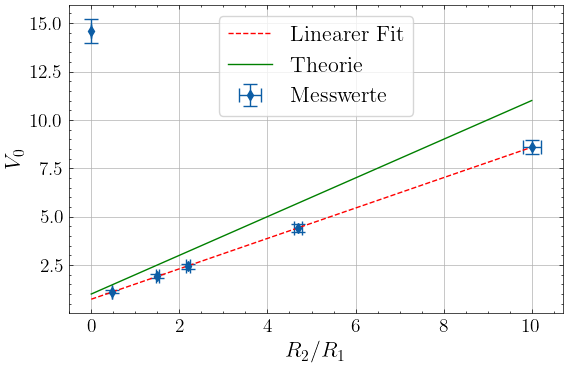

In [48]:
# Deine Daten
R_2 = np.array([0, 0.47, 1.5, 2.2, 4.7, 10])
U_A = np.array([14.6, 1.12, 1.92, 2.44, 4.40, 8.60])
dR_2 = R_2 * 0.01
dU_A = U_A * 0.005 + 0.03

R_1 = 1  # kOhm
U_E = 1  # V
dU_E = 0.035

# 1. Verstärkung berechnen
V = U_A / U_E
dV = V * (dU_A / U_A + dU_E / U_E)

# 2. Verhältnis berechnen
ratio = R_2 / R_1
d_ratio = ratio * 0.02

def ffit(x, k,d):
    return k*x + d

mask = R_2 > 0  # Filtere R_2 = 0 heraus
popt, pcov = curve_fit(ffit, ratio[mask], V[mask])
d_slope, d_intercept = np.sqrt(np.diag(pcov))

slope, intercept = popt

print(f"Steigung m = {slope:.3f} pm {d_slope:.3f}")
print(f"y-Achsenabschnitt b = {intercept:.3f} pm {d_intercept:.3f}")
print(f"\nTheoretische Werte: m = 1, b = 1")
print(f"Theoretische Gleichung: V = 1 + R2/R1")

# 4. Plot
plt.figure(figsize=(6, 4))
plt.errorbar(ratio, V, xerr=d_ratio, yerr=dV, fmt='d', 
             label='Messwerte', capsize=5, markersize=5)

# Fit-Gerade
x_fit = np.linspace(0, max(ratio), 100)
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, 'r--', 
         label=f'Linearer Fit')

# Theoretische Gerade
y_theo = 1 + x_fit
plt.plot(x_fit, y_theo, 'g-', 
         label='Theorie')

plt.xlabel('$R_2/R_1$', fontsize=16)
plt.ylabel('$V_0$', fontsize=16)
plt.legend(fontsize=16, frameon=True)
plt.grid(True)
plt.tight_layout()

In [4]:
td = 0.59 
dtd = 0.05
T = 2.25

phi = 2*np.pi* td/T
dphi = phi* (dtd / td + dtd / T)
print(phi, dphi)

1.647590813882647 0.17623946935693852
